In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Is there a Connection between the use of  Hypothesis Testing and Confidence Intervals to Test Hypotheses?

## Example 1: In the case of `Swain vs. Alabama` ##

Amendment VI of the United States Constitution states that, “In all criminal prosecutions, the accused shall enjoy the right to a speedy and public trial, by an impartial jury of the State and district wherein the crime shall have been committed.”

One characteristic of an impartial jury is that it should be selected from a jury panel that is representative of the population of the relevant region. A jury panel is a group of people chosen to be prospective jurors.

At the time of the trial, only men aged 21 or more were eligible to serve on juries in Talladega County. In that population, 26% of the men were Black. As is common in jury trials, the jurors in the trial of Robert Swain were selected from a panel of people who were supposed to be representative of the population of eligible jurors. But only eight men among the panel of 100 men (that is, 8%) were Black.

### Hypothesis Test

Summary of steps to be followed:

- State the Null and Alternative Hypothesis. The null hypothesis is a hypothesis under which you can simulate data.
-  Define the test statistic based on the characteristics of the problem. 
- Assume that the null hypothesis were true and we can simulate data based on the model. ( That is, we can simulate drawing at random from a population of whom 26% are Black. Our simulation will show what a panel would be like if it were selected at random.
- The reasoning in the last step above can be used as basis to to write the the values in the model/population proportion array.
- We can then compare the results of the simulation with the composition of an actual jury panel.
- If the results of our simulation are not consistent with the composition of the panel in the trial, that will be evidence against the model of random selection. Therefore, it will be evidence against the fairness of the trial.

In [32]:
population_proportions = make_array(.26, .74) # Based on assumed/expected population proportion

def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

panels = make_array()

num_simulations = 100000

for i in np.arange(num_simulations):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

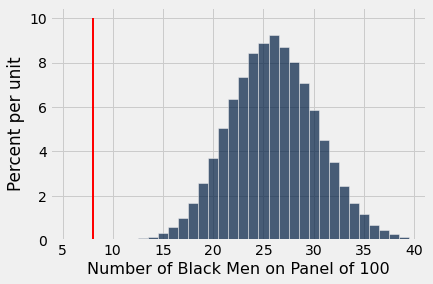

In [33]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))
plots.plot([8, 8], [0, .1], color='red', lw=2);

In [34]:
# Compute the p-value and compare with the p-value cut-off(level of significance) of 0.05.

print("p-value = ", sum(panels <= 8)/num_simulations)

p-value =  1e-05


Using a p-value cutoff of 0.05, the p-value above is lesser than the p-value cutoff of 0.05.

- This implies that since the p-value is lesser than the cutoff value, we can conclude that the observed test statistic is not consistent with the null hypothesis being true. 

- This leads to the rejection of the null hypothesis.

### Using the Confidence Interval for an  Unknown Population Parameter to test Hypothesis###

Summary of steps to be followed:

- Assuming we do not know the actual population proportion of black men there are in the County and would like to estimate it based on a random sample of data collected.
- Draw a large random sample(without replacement) from the population.
- Bootstrap your random sample and get an estimate from the new random sample.
- Repeat the above bootstrap step thousands of times, and get thousands of estimates.
- Pick off the “middle 95%” interval of all the estimates.
- This use of confidence intervals is the result of a duality between confidence intervals and tests: if you are testing whether or not the population proportion/mean is a particular value x(26% in this example), and you use the 5% cutoff for the p-value, then you will reject the null hypothesis if x(26%) is not in your 95% confidence interval for the proportion/mean.

In [35]:
sample_panel_proportions = make_array(.08, .92) # Based on the first observed sample from the population for bootstrapping.

def bootstrap_proportion(size, distribution):
    return sample_proportions(size, distribution).item(0)

bootstrap_panels = make_array()

for i in np.arange(num_simulations):
    new_bootstrap_panel = bootstrap_proportion(100, sample_panel_proportions) * 100
    bootstrap_panels = np.append(bootstrap_panels, new_bootstrap_panel)


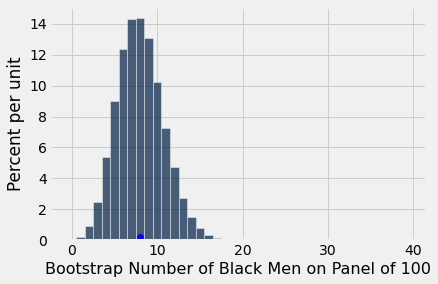

In [36]:
Table().with_column(
    'Bootstrap Number of Black Men on Panel of 100', bootstrap_panels
).hist(bins=np.arange(-0.5,40.))

plots.scatter(8, 0.002,color="blue", s=40, zorder=2);

In [37]:
left = percentile(2.5, bootstrap_panels)
right = percentile(97.5, bootstrap_panels)

left, right

(3.0, 14.000000000000002)

In [29]:
# What is the width of the 95% confidence interval?

width_95 = right - left
width_95

11.000000000000002

We predict with 95% confidence that if the jury pool were randomly selected,
it was selected from a population of between 3.0 and 14.0 percent black men.


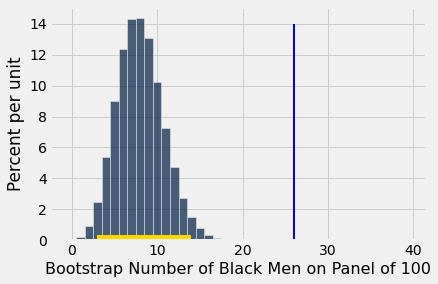

In [89]:
Table().with_column(
    'Bootstrap Number of Black Men on Panel of 100', bootstrap_panels
).hist(bins=np.arange(-0.5,40.))

plots.plot([left,right], [0,0], color="gold", lw=10);
plots.plot([26, 26], [0, 0.14], color="blue", lw=2);
print("We predict with 95% confidence that if the jury pool were randomly selected,")
print("it was selected from a population of between", left, "and",np.round(right,1), "percent black men.")

- Remember again that this use of confidence intervals is the result of a duality between confidence intervals and tests: if you are testing whether or not the population proportion/mean is a particular value x, and you use the 5% cutoff for the p-value, then you will reject the null hypothesis if x is not in your 95% confidence interval for the proportion/mean(for a two-sided hypothesis test).

- Since 26% does not fall in the 95% confidence interval computed above, it provides a similar result/conclusion - that if the jury pool were randomly selected, 26% is not a plausible estimate of the proportion of black men. 

- This leads again to the rejection of the null hypothesis using the 5% p-value cut-off.

### Care in Using the Bootstrap Percentile Method ###

In a relatable terms, the “no free lunch” (NFL) theorem in data science is a theorem that essentially implies that no approach or problem-solving approach is universally the best-performing method for all problems. 

Bsed on this thorem, we recognize that while bootstrap is an elegant and powerful method, [it is important to keep some points in mind before using it to construct confidence intervals.](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html)

### Comparing the Null and Bootstrap Distributions 

### Super-imposing the observed test statistic and the null value on the two distributions.

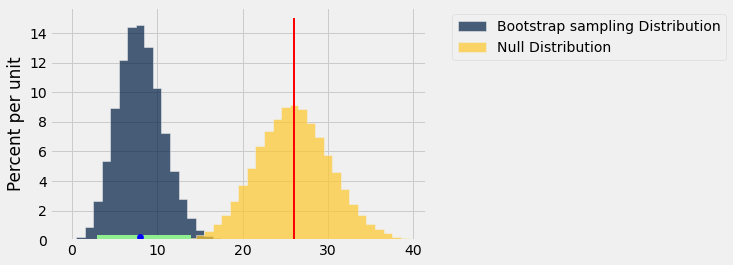

In [17]:
Table().with_columns(
    'Bootstrap sampling Distribution', bootstrap_panels,
    'Null Distribution', panels
).hist(bins=np.arange(-0.5,40.))
plots.plot(
    [left,right], 
    [0,0], 
    color="lightgreen", 
    lw=10, 
    zorder=1
);
plots.scatter(
    sample_panel_proportions.item(0)*100,
    0.002,
    color="blue",
    s=40,
    zorder=2);

plots.plot(
    [population_proportions.item(0)*100, population_proportions.item(0)*100], 
    [0, .15], 
    color='red', 
    lw=2
);

### Confidence level and the width of the confidence Interval.

In [25]:
left90 = percentile(5, bootstrap_panels)
right90 = percentile(95, bootstrap_panels)

left90, right90

(4.0, 13.0)

In [31]:
# What is the width of the 90% confidence interval?

width_95 = right90 - left90
width_95

9.0

If you were using the 1% cutoff for the P-value, you would have to check if the value specified in the null hypothesis lies in a 99% confidence interval for the population mean for a two-sided hypothesis test.

You should note how `Accuracy Vs Precision` is determined by some notable factors to be discussed in class

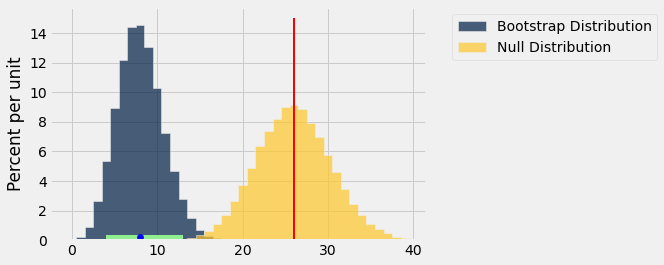

In [21]:
Table().with_columns(
    'Bootstrap Distribution', bootstrap_panels,
    'Null Distribution', panels
).hist(bins=np.arange(-0.5,40.))

plots.plot(
    [left90, right90], 
    [0,0], 
    color="lightgreen", 
    lw=10, 
    zorder=1
);
plots.scatter(
    sample_panel_proportions.item(0)*100,
    0.002,
    color="blue",
    s=40,
    zorder=2);

plots.plot(
    [population_proportions.item(0)*100, population_proportions.item(0)*100], 
    [0, .15], 
    color='red', 
    lw=2
);

## Example 2: Do Babies Understand Probability?

### The Experiment

Ten- to twelve-month-old infants were shown two jars of lollipop-shaped objects colored pink or black. Each infant first crawled or walked to whichever color they wanted, determining their “preferred” color. They were then given the choice between two jars that had the same number of preferred objects, but that differed in their probability of getting the preferred color; each jar had 12 in the preferred color and either 4 or 36 in the other color. Of the 24 infants studied, 18 chose the jar with the higher proportion of their preferred color. 

The researchers' goal here was to test whether or not the infants' choices were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

### Hypothesis Test ###

Remember that the infants chose the jar with the higher proportion of objects in their preferred color 18 out of 24 times(AKA the actual or observed proportion). 

Now, according to the researchers' model, on average, what proportion of times do we expect the infants to choose the jar with the higher proportion of objects in their preferred color? This will be the expected proportion if the null hypothesis were true.

A reasonable choice of the statistic would be **the absolute difference between the expected percent of infants' choices of the jar with the higher proportion of objects in their preferred color and the actual percent of infants' choices of the jar with the higher proportion of objects in their preferred color**

Null Hypothesis: 

- Babies are randomly selecting between the two jars

Alternative Hypothesis:

- Babies are not randomly selecting between the two jars

Now, we assume that the null hypothesis were true and we can simulate data based on the model. 

- This means that we would we can first assume that the null hypothesis were true, which means that the expected proportion of infants' choices is fixed at 0.5, but we understand that there might be random variations from this value, each time a random sample of 24 infants are allowed to make choices.

- Our simulation will show what values of the defined statistic we should expect to see if infants' choices were purely random.



In [72]:
model_proportions = make_array(0.5, 0.5) # Based on assumed/expected population proportion

def statistic(expected_prop, actual_prop): # Define a custom function that returns the value of the statistic
    return 100*abs(expected_prop - actual_prop)

observed_statistic = statistic(0.5, 18/24) # Use the defined function to return the OBSERVED test statistic
observed_statistic

25.0

In [41]:
def simulation_and_statistic(model_proportions, expected_proportion_correct):
       
    simulation_proportion_correct = sample_proportions(24, model_proportions)
    one_statistic = statistic(simulation_proportion_correct.item(0), expected_proportion_correct)
    
    return one_statistic

In [42]:
simulated_statistics = make_array()

for i in np.arange(num_simulations):
    simulated_statistic = simulation_and_statistic(model_proportions, 0.5)
    simulated_statistics = np.append(simulated_statistics, simulated_statistic)

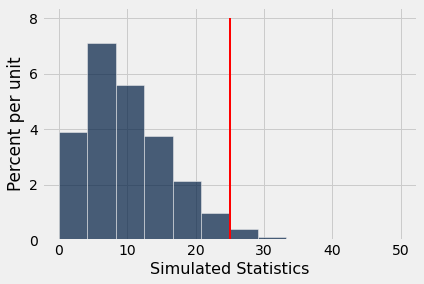

In [45]:
Table().with_column('Simulated Statistics', simulated_statistics).hist(bins = np.arange(0, 50, 4.16))
plots.plot([observed_statistic, observed_statistic], [0, .08], color='red', lw=2);

In [46]:
print("p-value:  ", sum(simulated_statistics >= observed_statistic)/num_simulations)

p-value:   0.02302


Suppose you were using a p-value cut-off of 5%, what would be your conlusion using both the p-value and the cutoff values?

### Confidence Interval 

In [77]:
sample_tt_proportions = make_array(18/24, 6/24) # Based on the first observed sample from the population for bootstrapping.

def bootstrap_proportion():
    return sample_proportions(24, sample_tt_proportions).item(0)

bootstrap_tt = make_array()

for i in np.arange(num_simulations):
    bootstrap_tt = np.append(bootstrap_tt, bootstrap_proportion())

In [80]:
left_tt_95 = percentile(2.5, bootstrap_tt)
right_tt_95 = percentile(97.5, bootstrap_tt)

left_tt_95 * 100, right_tt_95 * 100

(58.333333333333336, 91.666666666666657)

We predict with 95% confidence that if infants' selections were random,
the proportion of times we would expect the infants to choose the jar with the higher proportion
 of objects in their preferred color lies between 58.3 and 91.7 percent


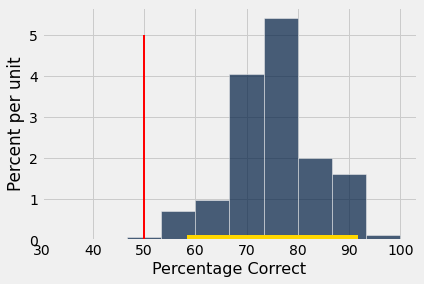

In [86]:
Table().with_column(
    'Percentage Correct', bootstrap_tt * 100
).hist()

plots.plot([left_tt_95 * 100, right_tt_95 * 100], [0,0], color="gold", lw=10, zorder=1);
plots.plot([50, 50], [0, .05], color='red', lw=2);
print("We predict with 95% confidence that if infants' selections were random,")
print("the proportion of times we would expect the infants to choose the jar with the higher proportion")
print(" of objects in their preferred color lies between", np.round(left_tt_95 * 100,1), "and",np.round(right_tt_95 * 100,1), "percent")

What would be your conclusion? 